# Trying to predict SPY and GOOGLE logreturns using ARIMA model

In [17]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [18]:
GOOGLE = pd.read_csv("GOOG.csv")
SPY = pd.read_csv("SPY.csv")

In [19]:
GOOGLE = GOOGLE[["Date","Close"]]
SPY = SPY[["Date","Close"]]

([<matplotlib.axis.XTick at 0x1aeeb28ab10>,
 [Text(0.0, 0, '2010-01-04'),
  Text(100.0, 0, '2010-05-27'),
  Text(200.0, 0, '2010-10-19'),
  Text(300.0, 0, '2011-03-14'),
  Text(400.0, 0, '2011-08-04'),
  Text(500.0, 0, '2011-12-27'),
  Text(600.0, 0, '2012-05-21'),
  Text(700.0, 0, '2012-10-11'),
  Text(800.0, 0, '2013-03-11'),
  Text(900.0, 0, '2013-08-01'),
  Text(1000.0, 0, '2013-12-23'),
  Text(1100.0, 0, '2014-05-19'),
  Text(1200.0, 0, '2014-10-09'),
  Text(1300.0, 0, '2015-03-05'),
  Text(1400.0, 0, '2015-07-28'),
  Text(1500.0, 0, '2015-12-17'),
  Text(1600.0, 0, '2016-05-12'),
  Text(1700.0, 0, '2016-10-04'),
  Text(1800.0, 0, '2017-02-28'),
  Text(1900.0, 0, '2017-07-21'),
  Text(2000.0, 0, '2017-12-12'),
  Text(2100.0, 0, '2018-05-08'),
  Text(2200.0, 0, '2018-09-28'),
  Text(2300.0, 0, '2019-02-25'),
  Text(2400.0, 0, '2019-07-18'),
  Text(2500.0, 0, '2019-12-09'),
  Text(2600.0, 0, '2020-05-04'),
  Text(2700.0, 0, '2020-09-24'),
  Text(2800.0, 0, '2021-02-18'),
  Text(2900

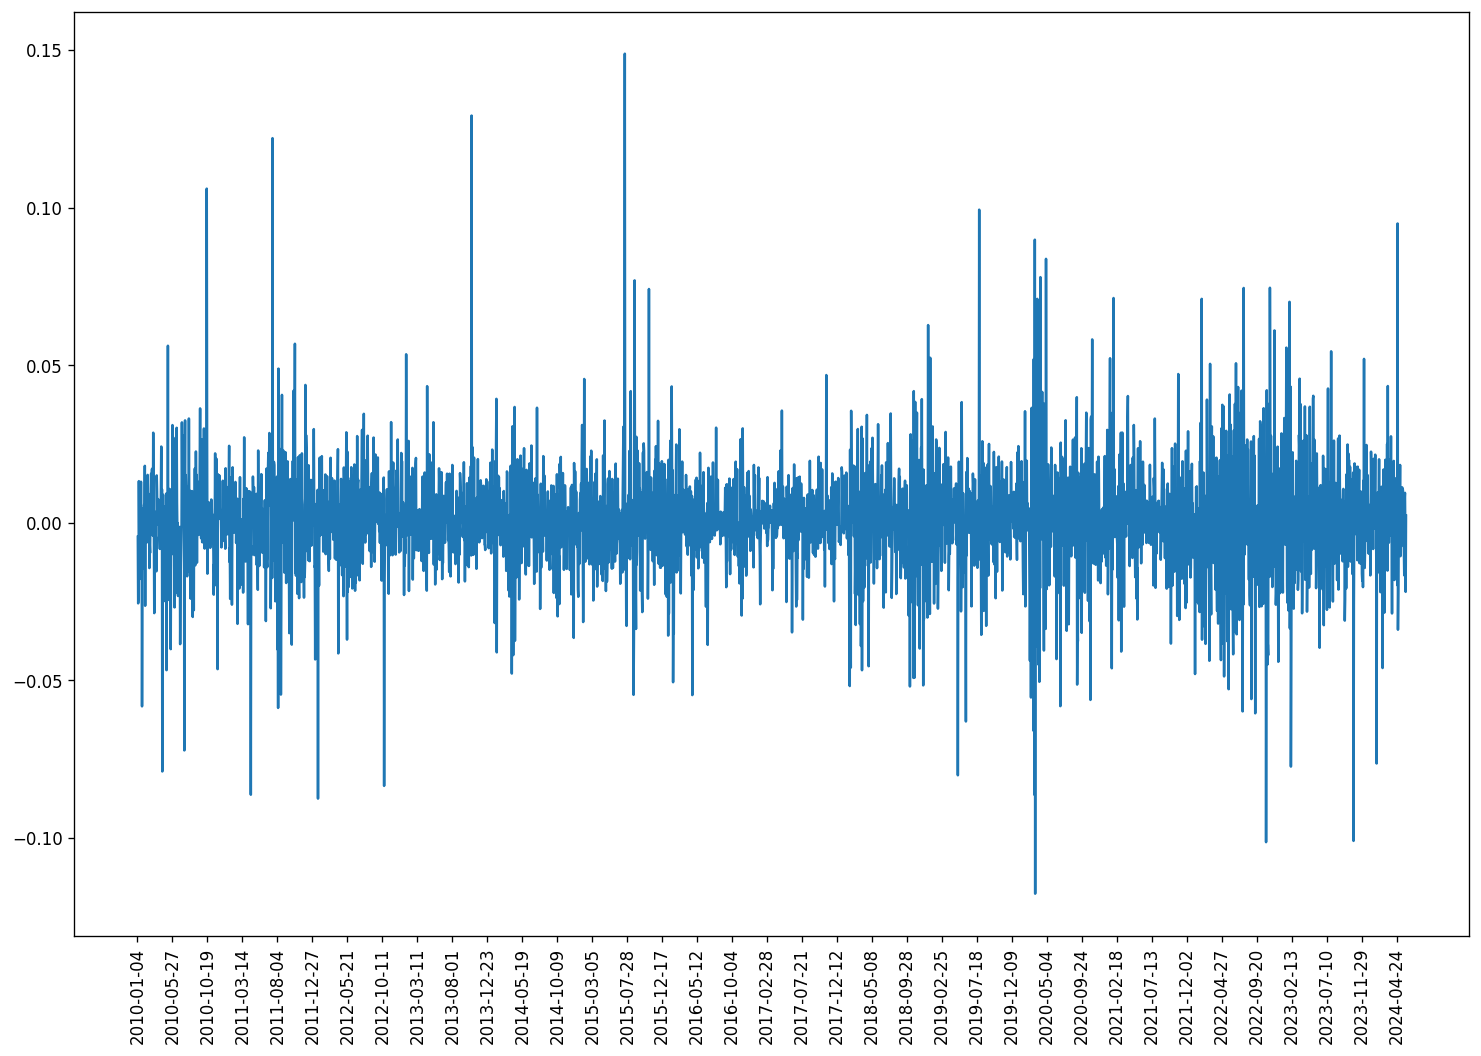

In [20]:
plt.plot(GOOGLE.Date,GOOGLE.Close.apply(lambda x: math.log(x)).diff())
plt.xticks(GOOGLE.Date[::100],  rotation='vertical')

([<matplotlib.axis.XTick at 0x1aee8fe6f90>,
 [Text(0.0, 0, '2010-01-04'),
  Text(100.0, 0, '2010-05-27'),
  Text(200.0, 0, '2010-10-19'),
  Text(300.0, 0, '2011-03-14'),
  Text(400.0, 0, '2011-08-04'),
  Text(500.0, 0, '2011-12-27'),
  Text(600.0, 0, '2012-05-21'),
  Text(700.0, 0, '2012-10-11'),
  Text(800.0, 0, '2013-03-11'),
  Text(900.0, 0, '2013-08-01'),
  Text(1000.0, 0, '2013-12-23'),
  Text(1100.0, 0, '2014-05-19'),
  Text(1200.0, 0, '2014-10-09'),
  Text(1300.0, 0, '2015-03-05'),
  Text(1400.0, 0, '2015-07-28'),
  Text(1500.0, 0, '2015-12-17'),
  Text(1600.0, 0, '2016-05-12'),
  Text(1700.0, 0, '2016-10-04'),
  Text(1800.0, 0, '2017-02-28'),
  Text(1900.0, 0, '2017-07-21'),
  Text(2000.0, 0, '2017-12-12'),
  Text(2100.0, 0, '2018-05-08'),
  Text(2200.0, 0, '2018-09-28'),
  Text(2300.0, 0, '2019-02-25'),
  Text(2400.0, 0, '2019-07-18'),
  Text(2500.0, 0, '2019-12-09'),
  Text(2600.0, 0, '2020-05-04'),
  Text(2700.0, 0, '2020-09-24'),
  Text(2800.0, 0, '2021-02-18'),
  Text(2900

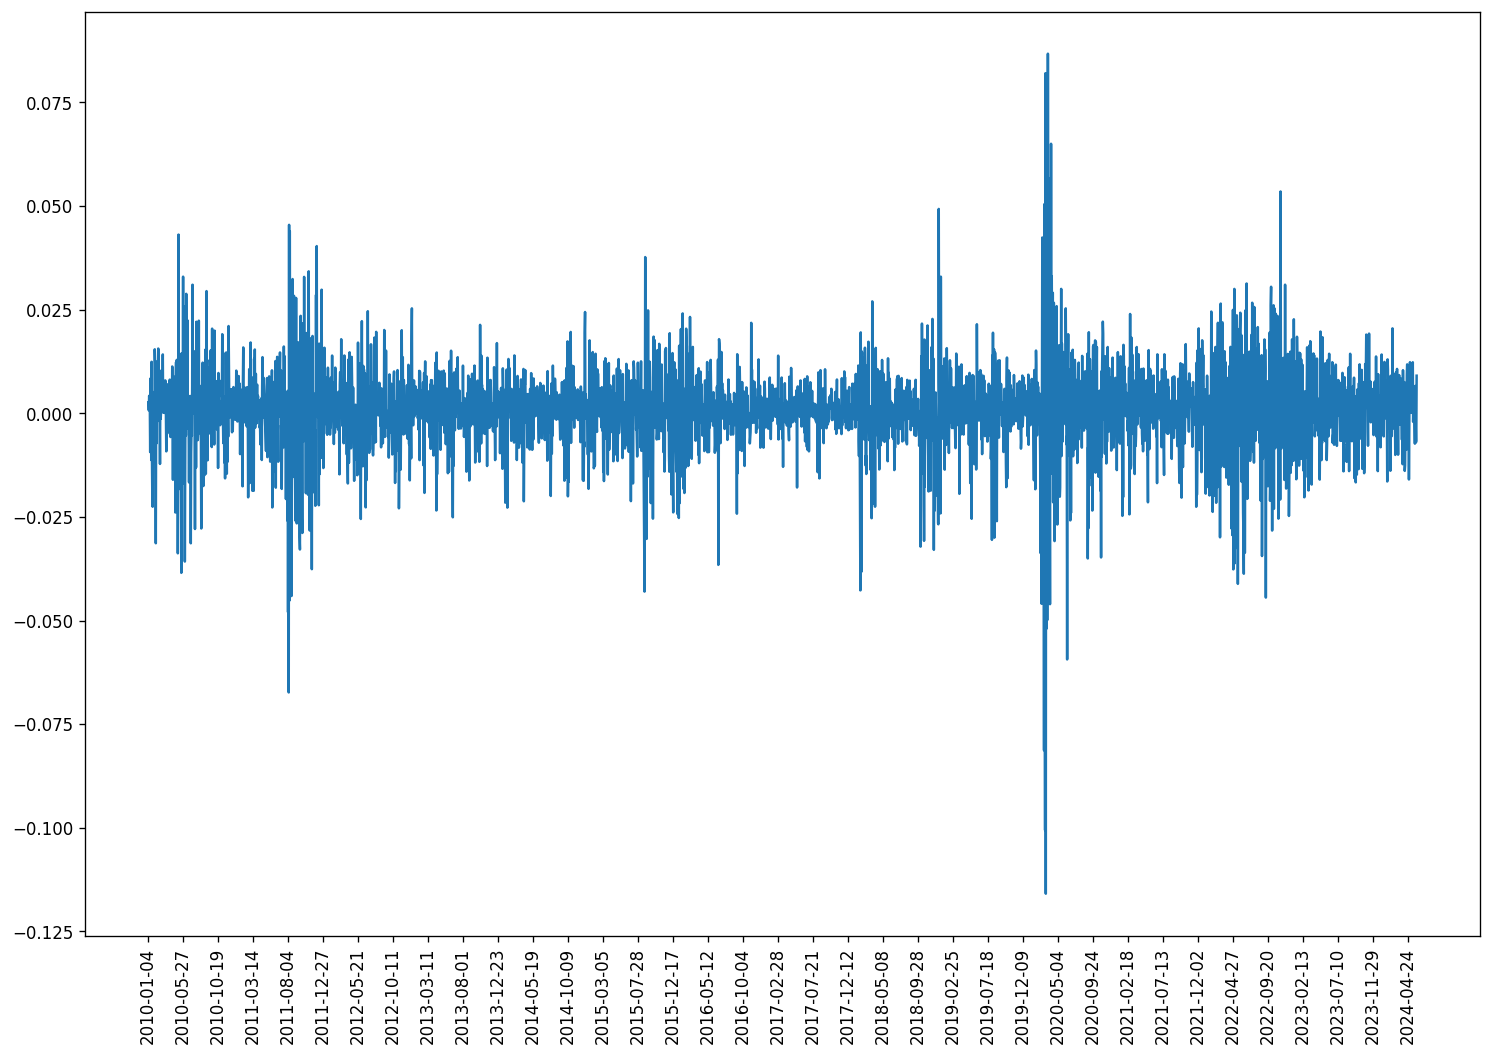

In [21]:
plt.plot(SPY.Date ,   SPY.Close.apply(lambda x:math.log(x)).diff()       )
plt.xticks(SPY.Date[::100],  rotation='vertical')

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
#Augmented Dicker Fully Test Shoes that the series is stationary

statsmodels.tsa.stattools.adfuller(SPY.Close.apply(lambda x:math.log(x)).diff().dropna() )

(-13.12159442318257,
 1.559124951454055e-24,
 26,
 3599,
 {'1%': -3.4321682745778963,
  '5%': -2.86234341192807,
  '10%': -2.56719766893431},
 -22426.13124848409)

In [24]:
statsmodels.tsa.stattools.adfuller(GOOGLE.Close.apply(lambda x:math.log(x)).diff().dropna()   )

(-14.155954999967575,
 2.1215143206747411e-26,
 21,
 3604,
 {'1%': -3.432165750199266,
  '5%': -2.862342296861383,
  '10%': -2.567197075308481},
 -19020.309047852905)

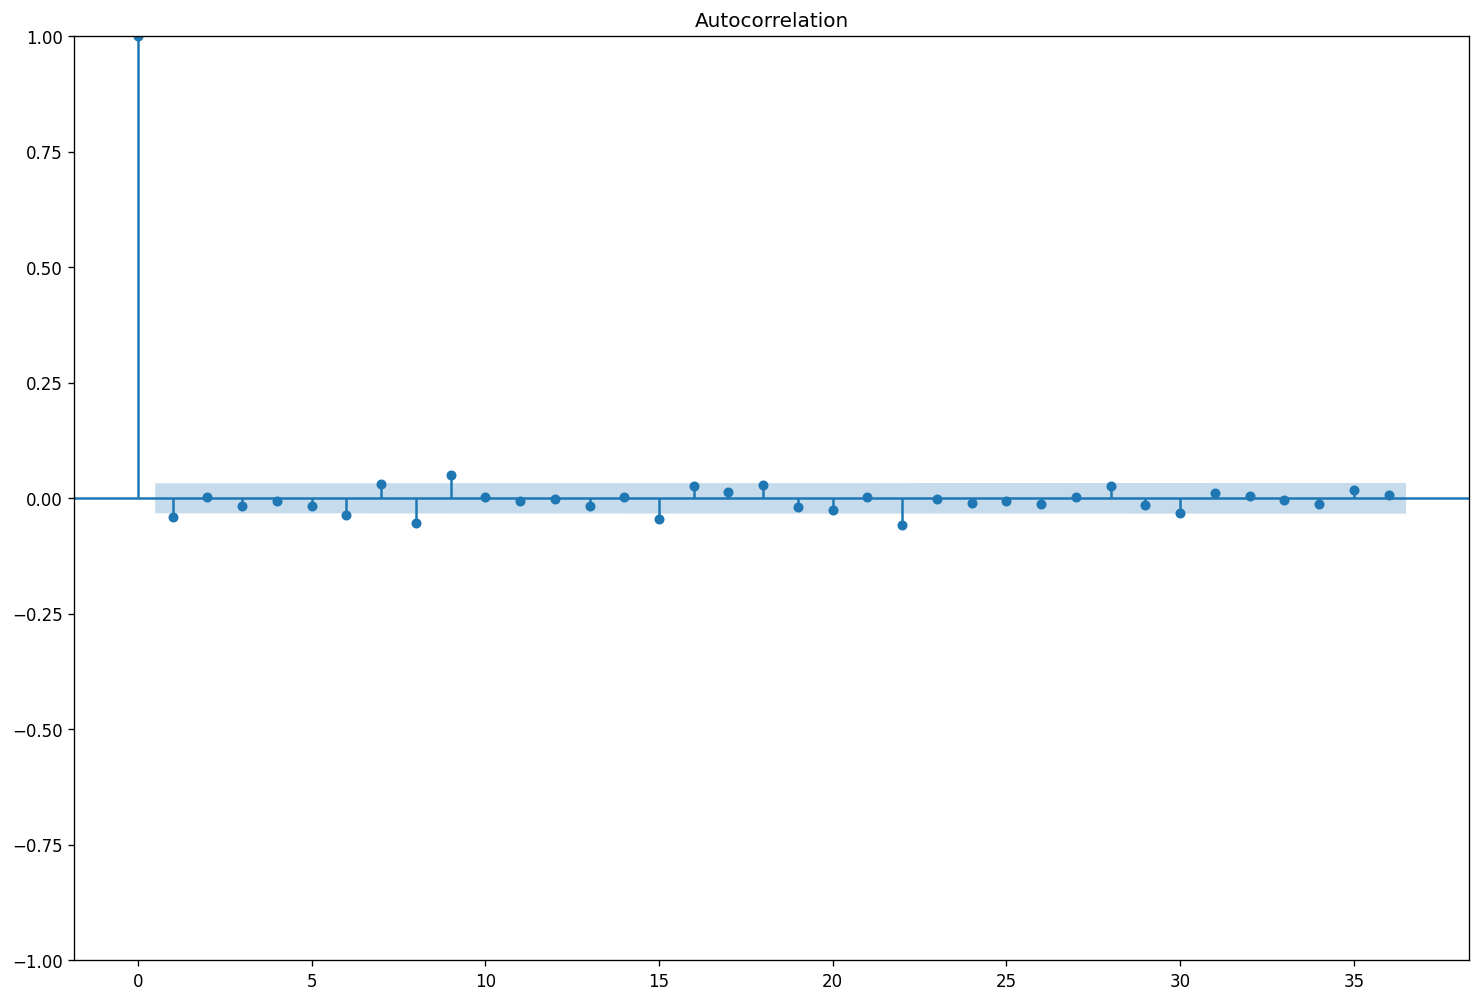

In [25]:
#Autocorrelation to test stationarity for GOOGLE

fig, ax = plt.subplots()
plot_acf(GOOGLE.Close.apply(lambda x:math.log(x)).diff().dropna() , ax=ax)
plt.show()

# plot_acf(GOOGLE.Close.apply(lambda x:math.log(x)).diff().dropna() ,lags=200)

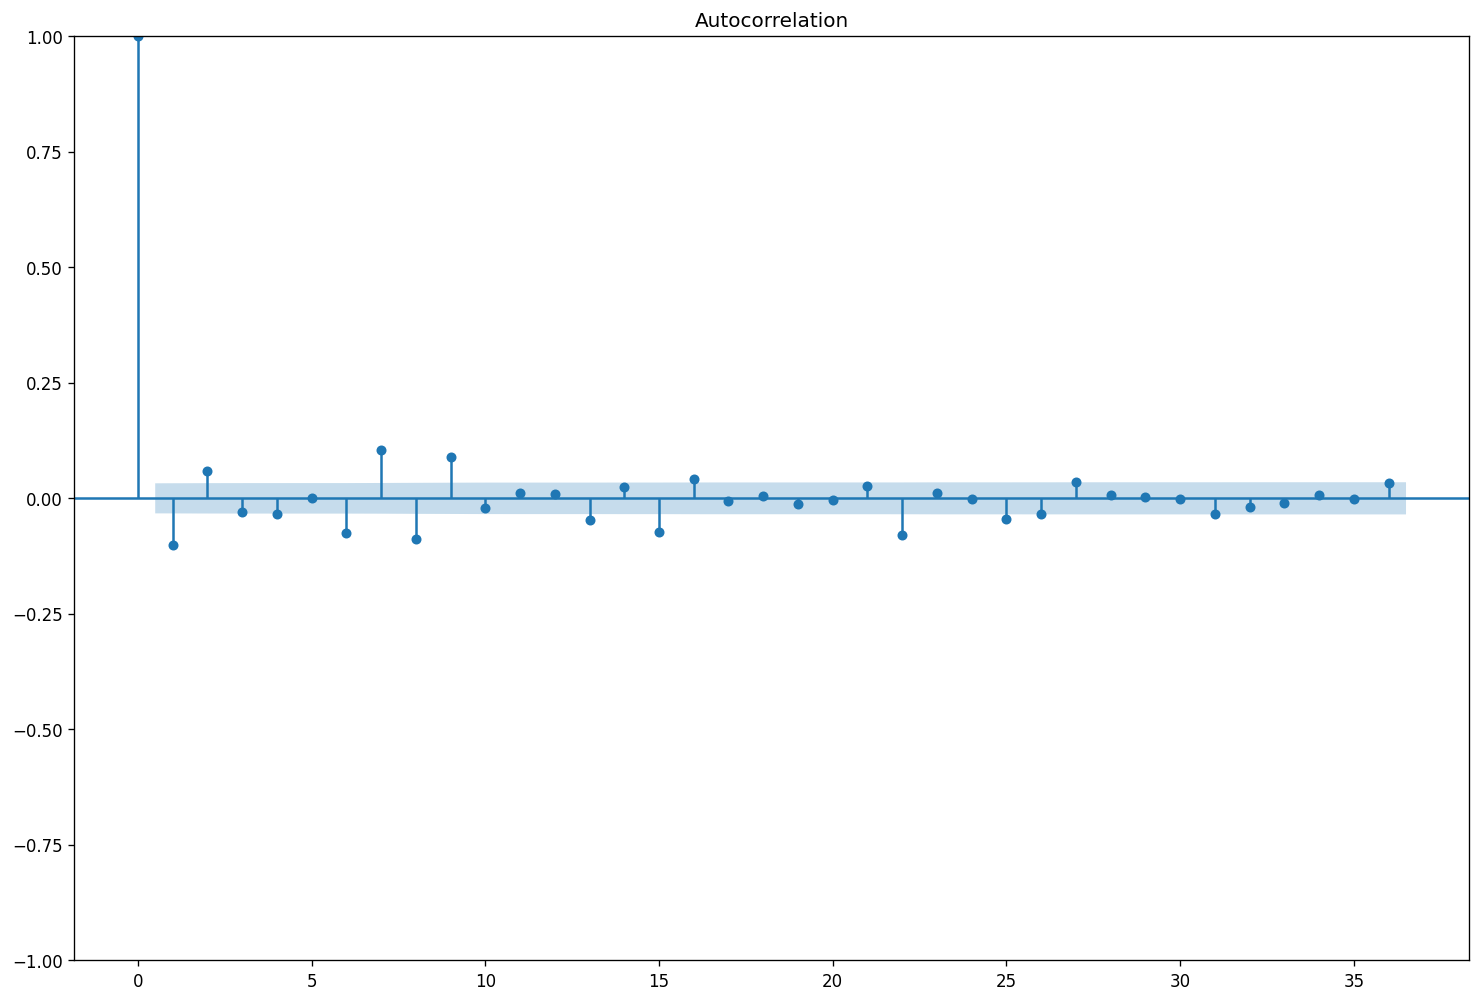

In [26]:
#Autocorrelation to test stationarity for SPY

fig, ax = plt.subplots()
plot_acf(SPY.Close.apply(lambda x:math.log(x)).diff().dropna() , ax=ax)
plt.show()

#plot_acf(SPY.Close.apply(lambda x:math.log(x)).diff().dropna() ,lags=200)

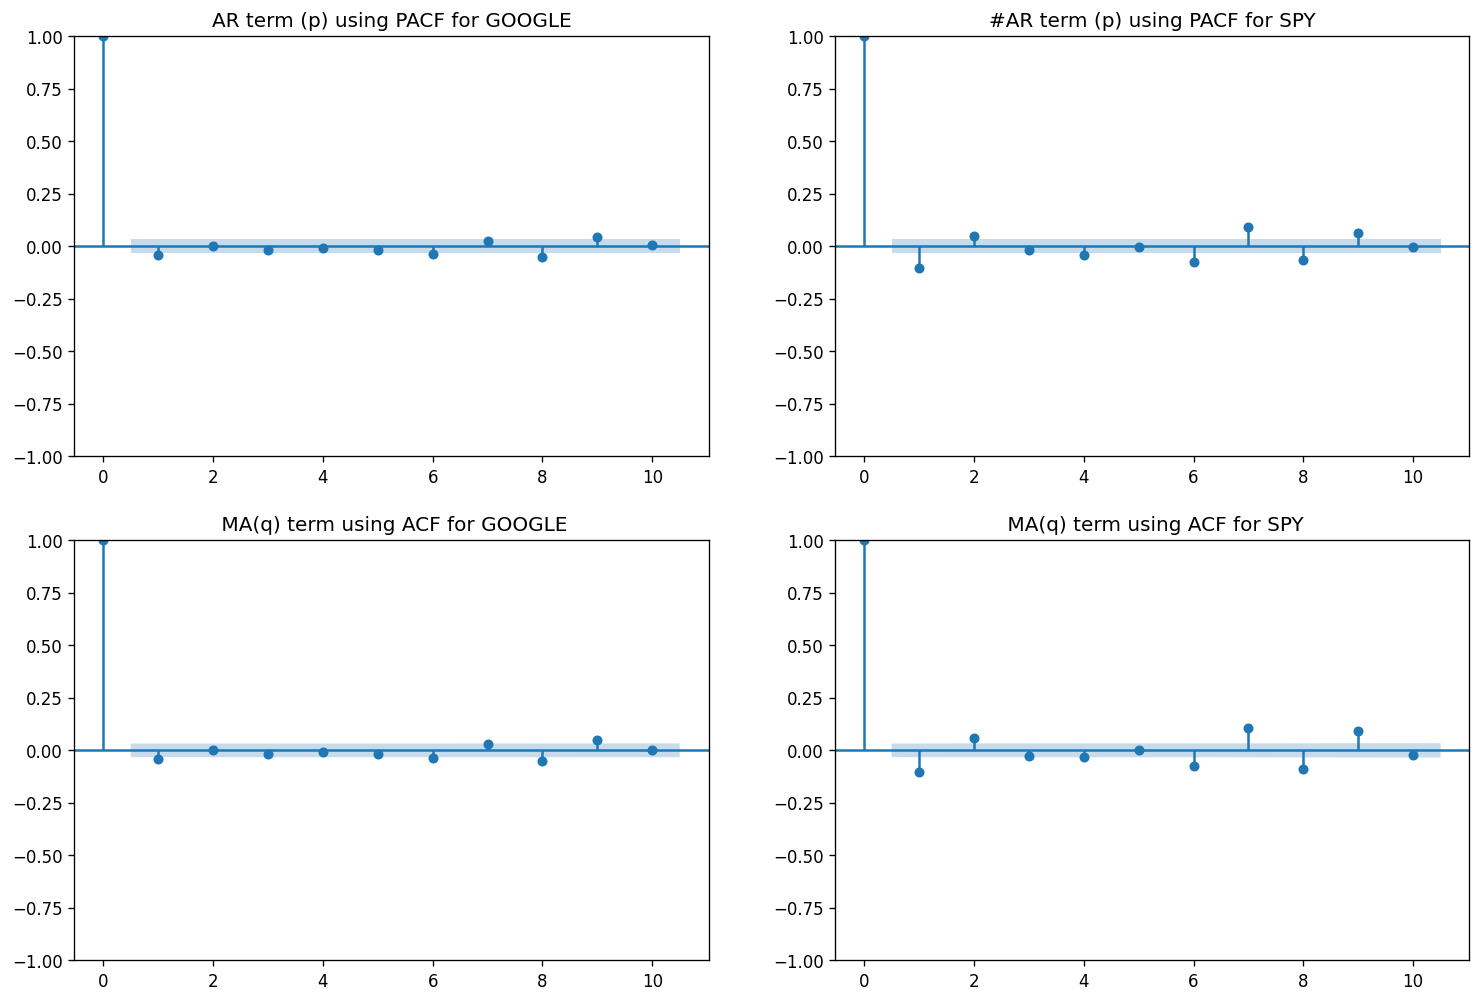

In [27]:
#Finding AR term (p) using PACF for GOOGLE

#fig, axes = plt.subplots()
#plot_pacf(SPY.Close.apply(lambda x:math.log(x)).diff().dropna())

plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

fig, ax = plt.subplots(2,2)
plot_pacf(GOOGLE.Close.apply(lambda x:math.log(x)).diff().dropna(),title="AR term (p) using PACF for GOOGLE",lags=10,ax=ax[0,0])
plot_pacf(SPY.Close.apply(lambda x:math.log(x)).diff().dropna(),title="#AR term (p) using PACF for SPY",lags=10,ax=ax[0,1])
plot_acf(GOOGLE.Close.apply(lambda x:math.log(x)).diff().dropna(),title=" MA(q) term using ACF for GOOGLE",lags=10,ax=ax[1,0])
plot_acf(SPY.Close.apply(lambda x:math.log(x)).diff().dropna(),title=" MA(q) term using ACF for SPY",lags=10,ax=ax[1,1])

plt.show()


#Output 

# GOOGLE - p = 1 , q = 1
# SPY - p = 2 , q = 2

In [28]:
#Training_the_model

from statsmodels.tsa.arima.model  import ARIMA

train_size = int(len(GOOGLE) * 0.8)
Google_train, Google_test = GOOGLE[:train_size], GOOGLE[train_size:]

model = ARIMA(Google_train.Close.apply(lambda x:math.log(x)).diff().dropna(), order=(1,0,1))
model_fit = model.fit()

print(model_fit.summary())

c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2900
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7824.273
Date:                Sat, 15 Jun 2024   AIC                         -15640.546
Time:                        16:14:40   BIC                         -15616.656
Sample:                             0   HQIC                        -15631.938
                               - 2900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      2.496      0.013       0.000       0.001
ar.L1         -0.3281      0.234     -1.403      0.161      -0.786       0.130
ma.L1          0.2790      0.238      1.172      0.2

c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


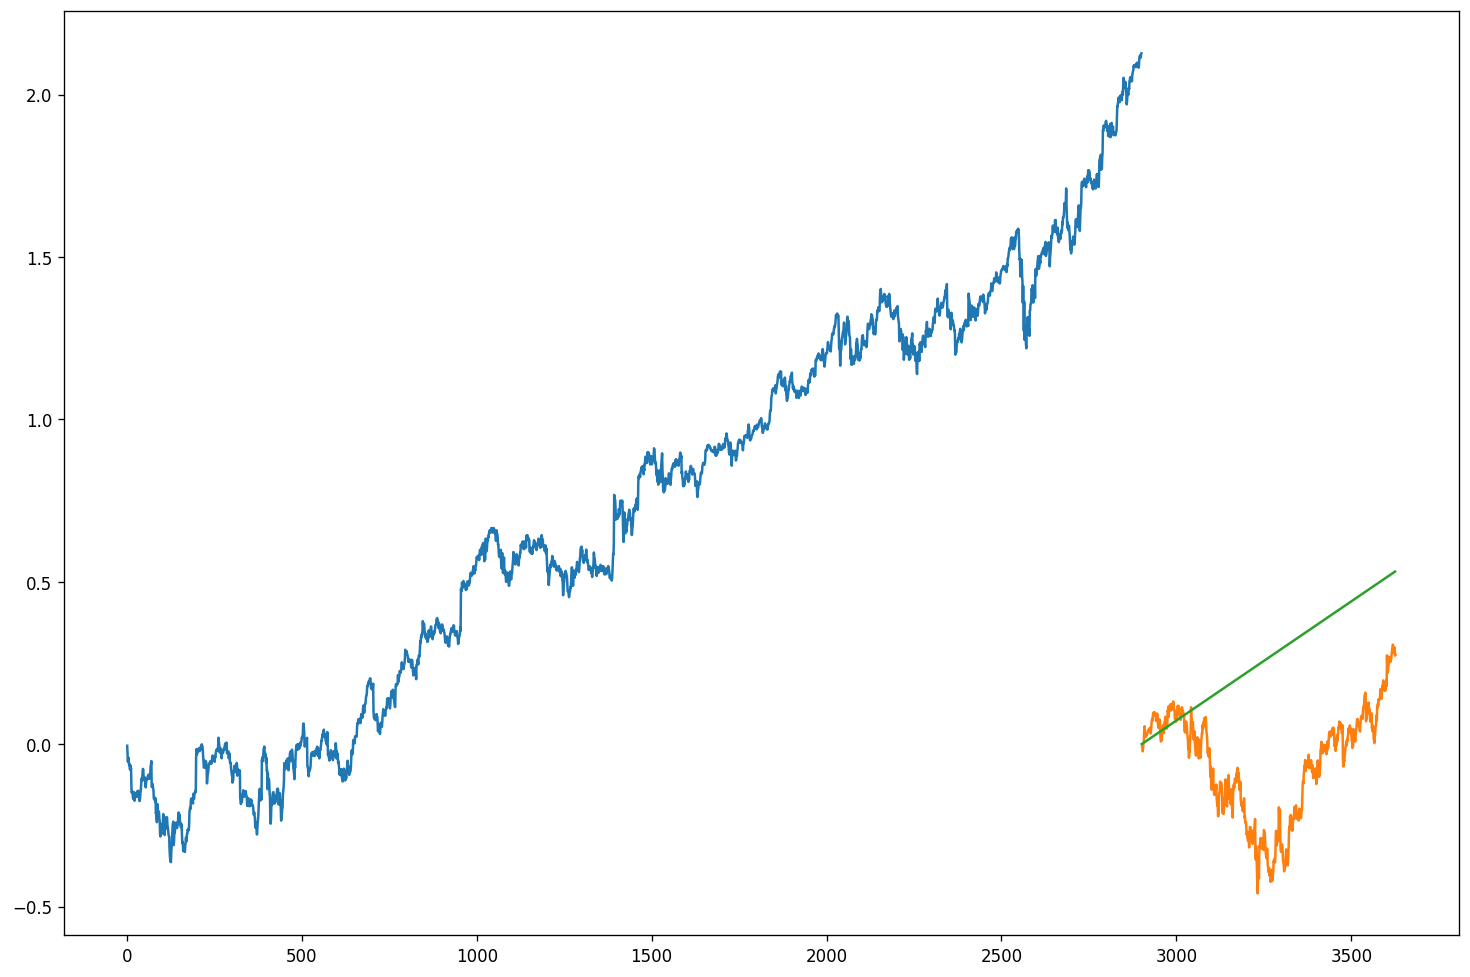

In [29]:
#Forecasting test data

fc = model_fit.forecast(len(Google_test))

fc_series =    pd.Series(fc, index=Google_test.index)


plt.plot(Google_train.Close.apply(lambda x:math.log(x)).diff().dropna().cumsum(), label='training')
plt.plot(Google_test.Close.apply(lambda x:math.log(x)).diff().dropna().cumsum(), label='actual')
plt.plot(fc_series.cumsum(), label='forecast')

In [30]:
from statsmodels.tsa.arima.model  import ARIMA

train_size = int(len(SPY) * 0.8)
SPY_train, SPY_test = SPY[:train_size], SPY[train_size:]

model = ARIMA(SPY_train.Close.apply(lambda x:math.log(x)).diff().dropna(), order=(2,0,2))
model_fit = model.fit()

print(model_fit.summary())


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2900
Model:                 ARIMA(2, 0, 2)   Log Likelihood                9036.159
Date:                Sat, 15 Jun 2024   AIC                         -18060.318
Time:                        16:14:45   BIC                         -18024.483
Sample:                             0   HQIC                        -18047.406
                               - 2900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.080      0.038    2.67e-05       0.001
ar.L1          0.1021      0.240      0.426      0.670      -0.368       0.572
ar.L2          0.2655      0.151      1.755      0.0

c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


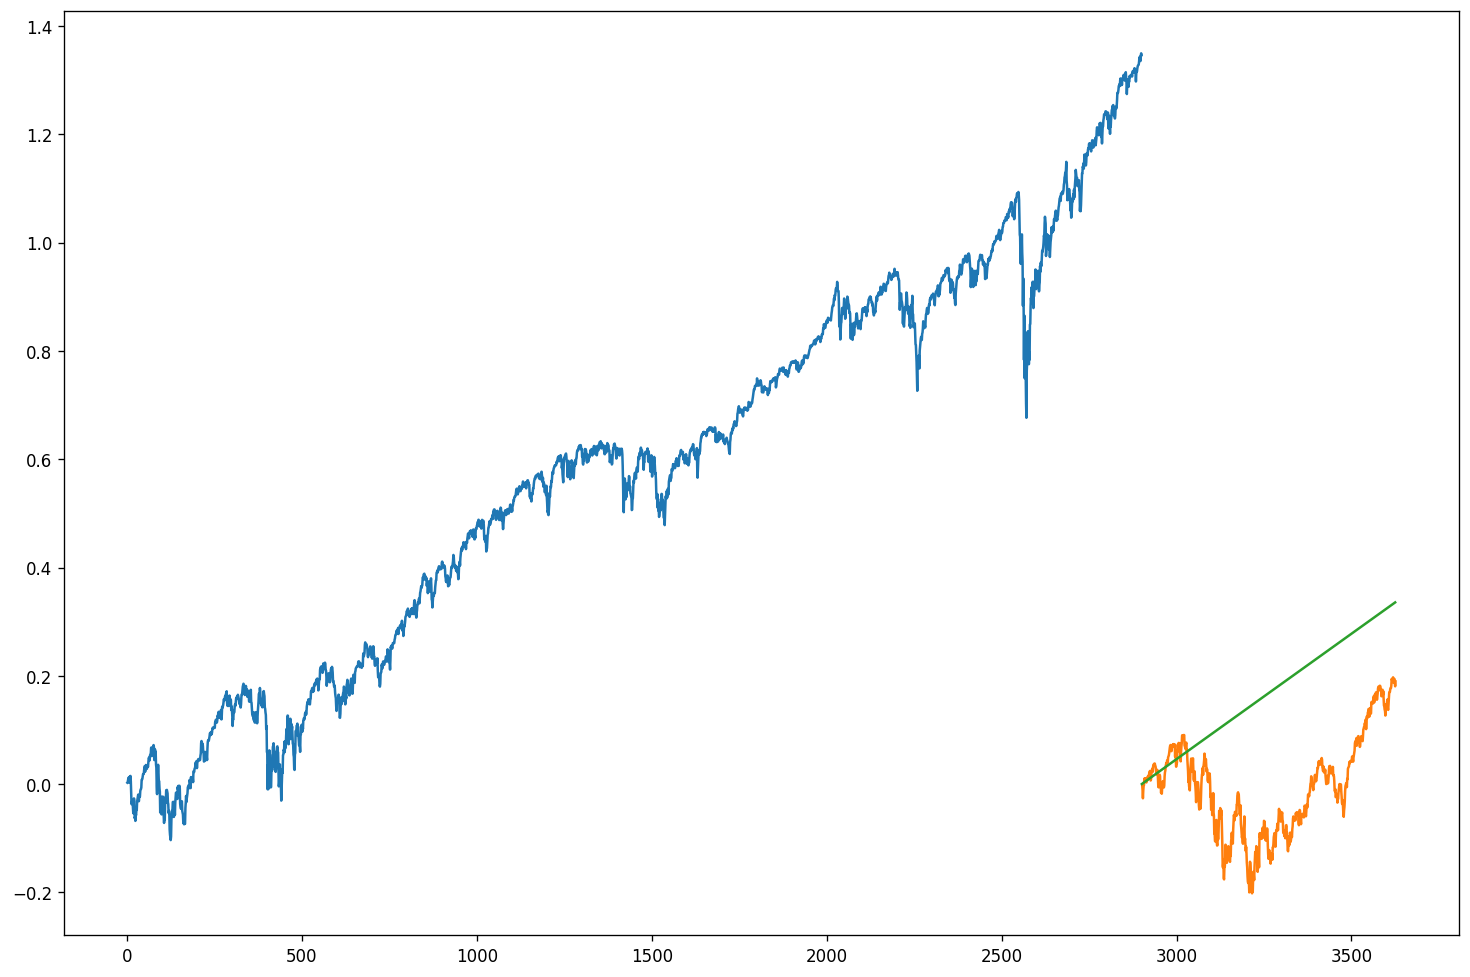

In [31]:
fc = model_fit.forecast(len(SPY_test))

fc_series =    pd.Series(fc, index=SPY_test.index)

plt.plot(SPY_train.Close.apply(lambda x:math.log(x)).diff().dropna().cumsum(), label='training')
plt.plot(SPY_test.Close.apply(lambda x:math.log(x)).diff().dropna().cumsum(), label='actual')
plt.plot(fc_series.cumsum(), label='forecast')

In [32]:
# Output - The result is that the output values are able to predict a trend, but difficult to predict the uncertainity or variance for that we may 
# add a GARCH model to forecast volatility
print(len(GOOGLE))

3627


In [81]:
#Use a rolling window. This will forecast future based on the actual past values, not the forecasted past values  
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

X = GOOGLE.Close.apply(lambda x:math.log(x)).diff().dropna()
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 print(t)
 model = ARIMA(history, order=(1,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test.values[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes

0
predicted=0.001404, expected=0.005370
1
predicted=0.000205, expected=0.006894
2
predicted=0.000300, expected=-0.022297
3


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001571, expected=0.017409
4


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000350, expected=-0.021155
5
predicted=0.001631, expected=-0.016859
6
predicted=0.001157, expected=0.028393
7
predicted=-0.000798, expected=-0.002476
8
predicted=0.000813, expected=0.010873
9
predicted=0.000032, expected=-0.011098
10
predicted=0.001118, expected=-0.022112
11
predicted=0.001477, expected=0.015892
12


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000272, expected=0.007233
13
predicted=0.000308, expected=0.004943
14


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000355, expected=0.033281
15
predicted=-0.000914, expected=-0.003801
16
predicted=0.000898, expected=0.009637
17
predicted=0.000089, expected=-0.006920
18
predicted=0.000934, expected=-0.004132
19
predicted=0.000705, expected=0.022943
20
predicted=-0.000488, expected=0.055607
21


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001749, expected=0.019253
22
predicted=0.000065, expected=-0.019959
23
predicted=0.001506, expected=-0.025315
24
predicted=0.001583, expected=0.024811
25


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000556, expected=0.015510
26
predicted=-0.000020, expected=-0.027788
27


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001806, expected=0.019412
28
predicted=-0.000306, expected=0.015500
29


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000068, expected=0.070142
30


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.002326, expected=-0.033458
31
predicted=0.002247, expected=-0.016772
32
predicted=0.001336, expected=0.043220
33
predicted=-0.001296, expected=-0.077331
34
predicted=0.004316, expected=-0.046463
35
predicted=0.002860, expected=-0.006305
36
predicted=0.000949, expected=0.001475
37
predicted=0.000525, expected=-0.000526
38
predicted=0.000593, expected=0.022391
39
predicted=-0.000403, expected=-0.013687
40
predicted=0.001135, expected=-0.012502
41


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001151, expected=-0.027220
42
predicted=0.001773, expected=-0.002720
43
predicted=0.000728, expected=-0.007984
44


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000909, expected=-0.019067
45


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001387, expected=0.008359
46
predicted=0.000218, expected=0.002217
47


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000447, expected=0.002323
48
predicted=0.000450, expected=0.019692
49
predicted=-0.000296, expected=0.018355
50
predicted=-0.000249, expected=0.016456
51
predicted=-0.000148, expected=-0.014862
52
predicted=0.001183, expected=0.005084
53


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000366, expected=-0.021249
54
predicted=0.001472, expected=-0.017968
55


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001338, expected=0.007117
56


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000271, expected=0.027865
57
predicted=-0.000632, expected=0.024110
58
predicted=-0.000478, expected=0.045752
59
predicted=-0.001268, expected=0.013659
60
predicted=0.000083, expected=-0.005186
61
predicted=0.000802, expected=0.037642
62


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000924, expected=-0.015424
63
predicted=0.001271, expected=0.019385
64
predicted=-0.000234, expected=-0.001884
65
predicted=0.000720, expected=-0.028694
66
predicted=0.001764, expected=-0.016633
67


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001213, expected=0.005313
68
predicted=0.000348, expected=-0.005708
69
predicted=0.000824, expected=0.026107
70
predicted=-0.000483, expected=0.008712
71


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000283, expected=0.002000
72
predicted=0.000526, expected=-0.001619
73
predicted=0.000662, expected=0.036946
74
predicted=-0.000898, expected=-0.018069
75


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001407, expected=-0.007791
76
predicted=0.000892, expected=-0.008517
77
predicted=0.000932, expected=0.027836
78
predicted=-0.000555, expected=0.011670
79


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000159, expected=-0.028166
80
predicted=0.001760, expected=-0.012291
81
predicted=0.001100, expected=-0.000952
82


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000633, expected=0.008344
83
predicted=0.000255, expected=0.000094
84
predicted=0.000590, expected=0.008181
85
predicted=0.000264, expected=-0.020531
86
predicted=0.001432, expected=-0.001531
87
predicted=0.000657, expected=0.036843
88
predicted=-0.000908, expected=-0.001385
89
predicted=0.000615, expected=-0.004724
90
predicted=0.000795, expected=-0.016192
91
predicted=0.001266, expected=0.001320
92
predicted=0.000565, expected=-0.008612
93
predicted=0.000945, expected=0.009507
94
predicted=0.000215, expected=0.018886
95
predicted=-0.000185, expected=-0.002775
96
predicted=0.000685, expected=0.039420
97
predicted=-0.001005, expected=0.040323
98
predicted=-0.000991, expected=0.008688
99


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000283, expected=-0.008174
100
predicted=0.000937, expected=0.026409
101
predicted=-0.000406, expected=0.011508
102
predicted=0.000174, expected=0.016653
103
predicted=-0.000006, expected=-0.002188
104


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000725, expected=0.021035
105
predicted=-0.000176, expected=-0.020710
106
predicted=0.001465, expected=-0.013473
107


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001153, expected=0.022034
108
predicted=-0.000222, expected=0.008648
109


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000293, expected=-0.006318
110
predicted=0.000882, expected=-0.010242
111
predicted=0.001043, expected=0.008073
112
predicted=0.000332, expected=0.006891
113
predicted=0.000364, expected=0.011117
114
predicted=0.000204, expected=0.010057
115
predicted=0.000246, expected=-0.039630
116


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002182, expected=-0.002199
117
predicted=0.000777, expected=0.001629
118
predicted=0.000577, expected=0.011973
119
predicted=0.000167, expected=0.000643
120


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000595, expected=-0.000402
121
predicted=0.000652, expected=0.011272
122
predicted=0.000200, expected=-0.013849
123
predicted=0.001165, expected=-0.001694
124


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000724, expected=-0.021134
125
predicted=0.001462, expected=0.021296
126
predicted=-0.000183, expected=-0.006886
127
predicted=0.000887, expected=-0.032467
128
predicted=0.001922, expected=-0.000672
129


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000713, expected=0.017244
130
predicted=-0.000045, expected=-0.008876
131
predicted=0.000934, expected=0.007967
132
predicted=0.000331, expected=-0.003395
133
predicted=0.000744, expected=0.017024
134
predicted=-0.000039, expected=-0.013960
135
predicted=0.001150, expected=-0.006554
136
predicted=0.000919, expected=-0.027595
137


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001727, expected=0.007162
138
predicted=0.000386, expected=0.016096
139
predicted=-0.000031, expected=0.042633
140


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001068, expected=0.006945
141
predicted=0.000284, expected=-0.005104
142
predicted=0.000813, expected=-0.007867
143
predicted=0.000950, expected=-0.010532
144
predicted=0.001056, expected=-0.026827
145
predicted=0.001672, expected=0.006504
146
predicted=0.000427, expected=0.012965
147


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000117, expected=0.007439
148
predicted=0.000312, expected=0.054440
149
predicted=-0.001434, expected=0.001618
150
predicted=0.000506, expected=0.023890
151


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000250, expected=0.000752
152
predicted=0.000631, expected=-0.009208
153
predicted=0.000996, expected=-0.024950
154
predicted=0.001575, expected=0.001010
155
predicted=0.000601, expected=-0.001788
156


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000707, expected=0.026107
157
predicted=-0.000332, expected=-0.000758
158


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000680, expected=-0.012901
159
predicted=0.001127, expected=0.000461
160


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000630, expected=-0.000307
161
predicted=0.000654, expected=0.012672
162
predicted=0.000171, expected=-0.011904
163
predicted=0.001087, expected=-0.008944
164
predicted=0.000981, expected=0.010402
165
predicted=0.000258, expected=-0.018177
166
predicted=0.001320, expected=0.006380
167
predicted=0.000403, expected=0.005877
168


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000415, expected=0.026780
169


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000363, expected=-0.021167
170
predicted=0.001440, expected=0.002068
171


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000572, expected=0.008382
172
predicted=0.000323, expected=0.027688
173
predicted=-0.000406, expected=0.010572
174
predicted=0.000244, expected=0.003063
175
predicted=0.000537, expected=-0.004012
176
predicted=0.000805, expected=-0.000658
177


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000681, expected=-0.009850
178
predicted=0.001024, expected=0.006113
179
predicted=0.000426, expected=0.007315
180
predicted=0.000376, expected=0.003928
181
predicted=0.000505, expected=-0.012198
182
predicted=0.001111, expected=0.010454
183
predicted=0.000266, expected=0.010778
184


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000244, expected=-0.004977
185


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000837, expected=0.004761
186
predicted=0.000482, expected=-0.000936
187
predicted=0.000690, expected=-0.031017
188
predicted=0.001823, expected=-0.024291
189
predicted=0.001565, expected=-0.000838
190
predicted=0.000688, expected=0.006985
191
predicted=0.000385, expected=-0.020794
192
predicted=0.001401, expected=0.015408
193
predicted=0.000080, expected=0.012623
194
predicted=0.000157, expected=-0.009661
195
predicted=0.000984, expected=0.024868
196
predicted=-0.000277, expected=-0.013931
197


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001153, expected=0.022036
198
predicted=-0.000190, expected=-0.002057
199


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000727, expected=0.019948
200
predicted=-0.000109, expected=0.005535
201
predicted=0.000456, expected=-0.002153
202


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000740, expected=0.017800
203
predicted=-0.000021, expected=-0.010000
204
predicted=0.001052, expected=-0.012264
205
predicted=0.001119, expected=0.013689
206
predicted=0.000131, expected=0.003553
207
predicted=0.000523, expected=-0.012203
208


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001123, expected=-0.002156
209


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000739, expected=-0.016249
210
predicted=0.001271, expected=0.008447
211
predicted=0.000326, expected=0.015970
212
predicted=0.000042, expected=-0.100914
213


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.004627, expected=-0.025830
214
predicted=0.001767, expected=-0.000324
215


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000680, expected=0.018865
216
predicted=-0.000066, expected=-0.003585
217
predicted=0.000710, expected=0.017954
218
predicted=-0.000032, expected=0.007886
219


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000303, expected=0.013825
220
predicted=0.000110, expected=0.008250
221
predicted=0.000310, expected=0.007201
222
predicted=0.000361, expected=0.006474
223
predicted=0.000392, expected=-0.011851
224
predicted=0.001059, expected=0.017837
225


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000001, expected=-0.003138
226
predicted=0.000732, expected=0.013305
227


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000154, expected=0.006990
228
predicted=0.000373, expected=0.016868
229
predicted=0.000025, expected=-0.012770
230
predicted=0.001102, expected=0.007131
231
predicted=0.000393, expected=0.005063
232
predicted=0.000456, expected=0.010049
233


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000277, expected=-0.012939
234
predicted=0.001118, expected=-0.001231
235


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000703, expected=0.004120
236
predicted=0.000497, expected=-0.016145
237


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001238, expected=-0.018349
238
predicted=0.001327, expected=-0.004490
239
predicted=0.000815, expected=-0.020383
240
predicted=0.001374, expected=0.013383
241
predicted=0.000148, expected=-0.007278
242


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000897, expected=0.052035
243
predicted=-0.001296, expected=-0.013160
244
predicted=0.001185, expected=-0.014300
245


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001178, expected=-0.007900
246
predicted=0.000932, expected=0.002466
247
predicted=0.000544, expected=-0.005764
248


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000850, expected=0.004793
249
predicted=0.000455, expected=0.024722
250
predicted=-0.000285, expected=0.006611
251


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000393, expected=0.011233
252


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000230, expected=0.015207
253
predicted=0.000091, expected=0.006467
254
predicted=0.000420, expected=0.000700
255


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000629, expected=-0.009710
256
predicted=0.001008, expected=-0.001132
257


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000687, expected=-0.002480
258
predicted=0.000739, expected=-0.009769
259
predicted=0.001004, expected=0.005716
260
predicted=0.000431, expected=-0.016667
261
predicted=0.001262, expected=-0.004720
262


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000803, expected=0.022597
263
predicted=-0.000191, expected=0.014342
264


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000123, expected=0.008661
265


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000339, expected=-0.000904
266
predicted=0.000687, expected=0.003960
267


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000507, expected=-0.001110
268
predicted=0.000694, expected=-0.008294
269


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000953, expected=0.014590
270
predicted=0.000116, expected=0.020345
271
predicted=-0.000083, expected=-0.001759
272


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000722, expected=0.006545
273
predicted=0.000421, expected=0.011170
274
predicted=0.000257, expected=0.021646
275
predicted=-0.000112, expected=0.000976
276
predicted=0.000640, expected=0.006804
277
predicted=0.000425, expected=-0.011628
278
predicted=0.001093, expected=-0.076347
279
predicted=0.003349, expected=0.006397
280
predicted=0.000438, expected=0.005799
281
predicted=0.000439, expected=0.009637
282


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000304, expected=0.003307
283
predicted=0.000527, expected=0.008696
284
predicted=0.000343, expected=0.003675
285
predicted=0.000519, expected=0.020173
286
predicted=-0.000055, expected=-0.009968
287
predicted=0.001004, expected=-0.015995
288


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001229, expected=0.005247
289


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000484, expected=-0.021988
290


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001428, expected=-0.015261
291
predicted=0.001192, expected=0.003099
292


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000544, expected=0.011467
293
predicted=0.000241, expected=0.010237
294


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000281, expected=-0.000207
295


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000648, expected=-0.046058
296
predicted=0.002254, expected=0.009683
297
predicted=0.000365, expected=-0.019242
298
predicted=0.001316, expected=0.016955
299


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000029, expected=-0.012237
300
predicted=0.001081, expected=-0.028502
301
predicted=0.001647, expected=-0.003135
302
predicted=0.000742, expected=-0.009161
303


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000946, expected=0.020016
304
predicted=-0.000089, expected=0.007734
305
predicted=0.000353, expected=0.019257
306


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000044, expected=0.004882
307
predicted=0.000473, expected=0.008203
308
predicted=0.000351, expected=0.025044
309


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000228, expected=-0.015148
310


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001196, expected=0.043427
311


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000950, expected=-0.003779
312
predicted=0.000886, expected=0.011828
313
predicted=0.000204, expected=-0.006300
314


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000916, expected=0.020166
315


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000100, expected=-0.004094
316
predicted=0.000873, expected=0.003632
317


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000504, expected=0.001581
318
predicted=0.000613, expected=0.002104
319


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000584, expected=0.027466
320
predicted=-0.000328, expected=-0.004034
321
predicted=0.000902, expected=0.003203
322


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000524, expected=-0.028739
323
predicted=0.001721, expected=0.013077
324


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000069, expected=0.014190
325
predicted=0.000191, expected=0.012728
326
predicted=0.000244, expected=-0.003040
327
predicted=0.000816, expected=0.019658
328


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000065, expected=-0.010001
329
predicted=0.001110, expected=-0.018129
330
predicted=0.001291, expected=-0.002113
331
predicted=0.000684, expected=0.005625
332
predicted=0.000455, expected=0.003690
333
predicted=0.000547, expected=-0.011112
334
predicted=0.001078, expected=0.014219
335
predicted=0.000107, expected=0.012395
336
predicted=0.000257, expected=0.007352
337
predicted=0.000435, expected=-0.019747
338


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001407, expected=0.094994
339
predicted=-0.003030, expected=-0.033904
340
predicted=0.002465, expected=-0.019607
341
predicted=0.001430, expected=0.005633
342
predicted=0.000433, expected=0.017304
343
predicted=-0.000013, expected=0.003141
344
predicted=0.000569, expected=0.004958
345
predicted=0.000489, expected=0.018378
346
predicted=-0.000047, expected=-0.010577
347
predicted=0.001132, expected=0.002451
348
predicted=0.000583, expected=-0.007547
349


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000997, expected=0.003576
350
predicted=0.000537, expected=0.006009
351
predicted=0.000449, expected=0.011278
352
predicted=0.000240, expected=0.008875
353
predicted=0.000346, expected=0.010547
354
predicted=0.000281, expected=0.006578
355
predicted=0.000446, expected=0.006033
356
predicted=0.000465, expected=-0.008614
357
predicted=0.001053, expected=-0.016655
358
predicted=0.001355, expected=0.007228
359


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000389, expected=0.009539
360
predicted=0.000319, expected=-0.003489
361
predicted=0.000844, expected=-0.021884
362
predicted=0.001570, expected=0.002302
Test RMSE: 0.019


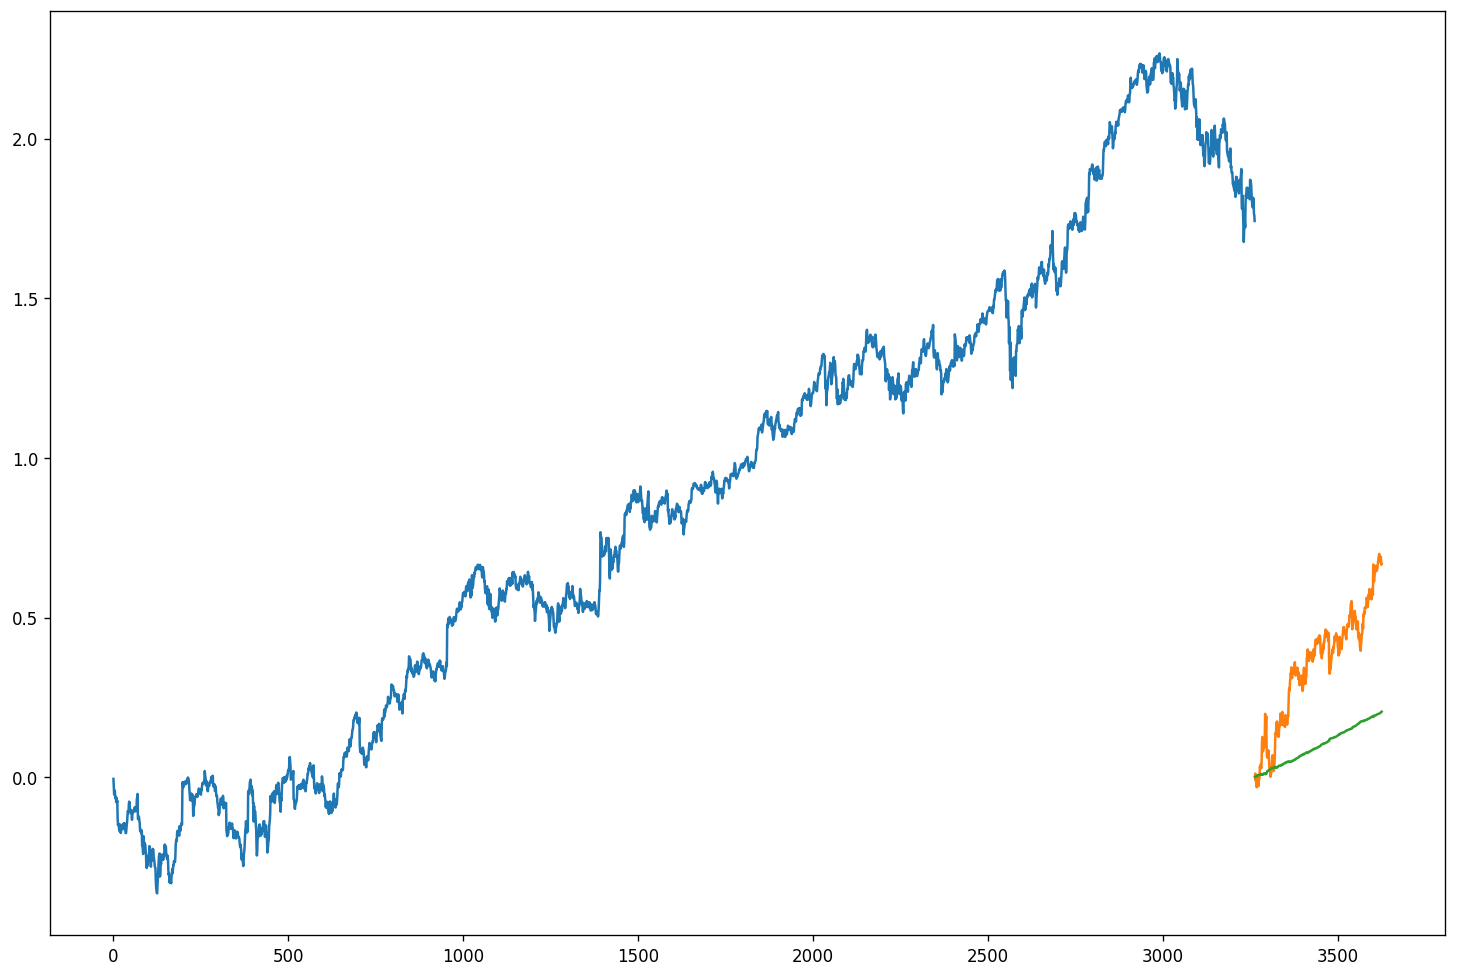

In [82]:
predictions_series = pd.Series(predictions, index=test.index)

plt.plot(train.cumsum(), label='training')
plt.plot(test.cumsum(), label='actual')
plt.plot(predictions_series.cumsum(), label='forecast')

In [39]:
#Using rolling window 
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

X = SPY.Close.apply(lambda x:math.log(x)).diff().dropna()
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 print(t)
 model = ARIMA(history, order=(2,0,2))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test.values[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes

0
predicted=0.001031, expected=0.001491
1
predicted=0.000153, expected=-0.003421
2
predicted=0.001067, expected=-0.007875
3
predicted=0.001185, expected=-0.014878
4
predicted=0.001773, expected=0.014229
5
predicted=-0.002332, expected=0.008064
6
predicted=0.000474, expected=0.002092
7
predicted=0.000534, expected=0.010235
8
predicted=-0.000550, expected=0.002452
9
predicted=0.000972, expected=-0.004568
10
predicted=0.001226, expected=-0.000410
11
predicted=0.000340, expected=0.004139
12
predicted=0.000030, expected=-0.004868
13
predicted=0.001360, expected=-0.002100
14
predicted=0.000384, expected=0.008103
15
predicted=-0.000592, expected=-0.004931
16
predicted=0.001622, expected=0.006313
17
predicted=-0.000699, expected=0.001651
18
predicted=0.000827, expected=-0.000814
19
predicted=0.000627, expected=0.001243
20
predicted=0.000344, expected=0.002482
21
predicted=0.000295, expected=0.002992
22
predicted=0.000296, expected=0.001818
23
predicted=0.000484, expected=0.002352
24
predicted=

c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000805, expected=0.009667
142
predicted=0.000026, expected=-0.023786
143
predicted=0.004160, expected=0.004691
144
predicted=-0.001671, expected=-0.003214
145
predicted=0.001417, expected=0.008194
146
predicted=-0.000945, expected=0.014530
147
predicted=-0.000593, expected=-0.018129
148
predicted=0.003565, expected=-0.019916
149
predicted=0.001543, expected=-0.003275
150
predicted=-0.000354, expected=0.015998
151
predicted=-0.001704, expected=0.001120
152
predicted=0.001256, expected=-0.021593
153
predicted=0.002889, expected=-0.006496
154
predicted=-0.000158, expected=-0.010790
155
predicted=0.001370, expected=-0.017898
156
predicted=0.001583, expected=0.014937
157
predicted=-0.002570, expected=0.021824
158
predicted=-0.001132, expected=-0.002562
159
predicted=0.001926, expected=-0.015347
160
predicted=0.002023, expected=0.018229
161
predicted=-0.002469, expected=-0.004991
162
predicted=0.002348, expected=-0.008158
163
predicted=0.000853, expected=-0.029922
164


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.003591, expected=-0.007611
165
predicted=-0.000706, expected=0.026458
166
predicted=-0.002921, expected=-0.004526
167


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002364, expected=-0.012797
168
predicted=0.001276, expected=-0.007335
169
predicted=0.000715, expected=0.021752
170


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.002490, expected=0.021932
171


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000736, expected=0.012433
172


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000118, expected=0.007791
173


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000395, expected=-0.000292
174
predicted=0.001125, expected=0.011633
175
predicted=-0.000723, expected=-0.012962
176


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002851, expected=0.014962
177
predicted=-0.002095, expected=0.004872
178
predicted=0.001177, expected=0.007088
179
predicted=-0.000265, expected=0.012295
180
predicted=-0.000293, expected=-0.006194
181
predicted=0.001952, expected=-0.015511
182
predicted=0.001845, expected=0.002830
183
predicted=-0.000611, expected=0.008530
184
predicted=-0.000197, expected=-0.012712
185
predicted=0.002282, expected=-0.010050
186
predicted=0.000744, expected=0.005026
187
predicted=-0.000547, expected=-0.002678
188
predicted=0.001029, expected=-0.017240
189
predicted=0.002074, expected=-0.003712
190
predicted=-0.000166, expected=0.011388
191
predicted=-0.000961, expected=-0.012530
192
predicted=0.002400, expected=0.000411
193
predicted=-0.000550, expected=0.016014
194
predicted=-0.001150, expected=-0.000742
195
predicted=0.001351, expected=-0.015066
196
predicted=0.001965, expected=-0.027823
197
predicted=0.002793, expected=0.005781
198
predicted=-0.001744, expected=-0.029388
199


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.004169, expected=0.002808
200
predicted=-0.002133, expected=0.024946
201
predicted=-0.001956, expected=-0.037656
202
predicted=0.005876, expected=0.006001
203
predicted=-0.002737, expected=0.004574
204
predicted=0.000707, expected=0.029998
205
predicted=-0.003205, expected=-0.036190
206
predicted=0.006421, expected=-0.005987
207
predicted=-0.001357, expected=-0.032541
208
predicted=0.004495, expected=0.002308
209
predicted=-0.002222, expected=-0.016014
210


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002622, expected=-0.001044
211
predicted=-0.001025, expected=0.023627
212
predicted=-0.002298, expected=-0.004066
213


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001967, expected=0.020362
214


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.002508, expected=-0.041147
215


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.006724, expected=-0.006143
216
predicted=-0.001742, expected=0.000436
217
predicted=0.000714, expected=0.018537
218
predicted=-0.002164, expected=-0.007663
219
predicted=0.002388, expected=0.008796
220


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001433, expected=0.019784
221


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001063, expected=0.024253
222
predicted=-0.001368, expected=-0.005627
223


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002485, expected=-0.008121
224
predicted=0.000962, expected=0.018864
225
predicted=-0.001762, expected=-0.016548
226
predicted=0.003646, expected=0.003040
227
predicted=-0.001097, expected=0.009547
228
predicted=0.000022, expected=-0.010932
229
predicted=0.002086, expected=-0.024070
230
predicted=0.002575, expected=-0.029424
231


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002512, expected=-0.038708
232


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002810, expected=-0.003018
233


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001890, expected=0.014156
234


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001466, expected=-0.033656
235
predicted=0.004394, expected=-0.002157
236
predicted=-0.001862, expected=0.024862
237
predicted=-0.002308, expected=-0.001815
238


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001524, expected=0.009755
239


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001163, expected=0.031299
240
predicted=-0.002304, expected=-0.003827
241


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002612, expected=-0.020644
242


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002299, expected=-0.000815
243
predicted=-0.000307, expected=-0.008157
244


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001450, expected=0.010521
245
predicted=-0.001375, expected=0.001887
246
predicted=0.000874, expected=0.003372
247
predicted=-0.000085, expected=0.014866
248


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000931, expected=-0.000823
249


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001364, expected=-0.011489
250
predicted=0.001572, expected=-0.008888
251
predicted=0.000918, expected=-0.005266
252
predicted=0.000588, expected=-0.002431
253
predicted=0.000335, expected=0.018925
254
predicted=-0.001880, expected=-0.008291
255
predicted=0.002324, expected=0.026661
256
predicted=-0.003332, expected=0.006353
257
predicted=0.001579, expected=0.010132
258
predicted=-0.000592, expected=-0.009321
259
predicted=0.001788, expected=0.001214
260
predicted=-0.000271, expected=-0.011902
261
predicted=0.002180, expected=0.025635
262
predicted=-0.003178, expected=0.012464
263
predicted=0.000080, expected=0.014473
264


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001428, expected=-0.002966
265
predicted=0.001108, expected=-0.006619
266
predicted=0.000812, expected=0.015538
267
predicted=-0.001257, expected=-0.000676
268
predicted=0.001640, expected=-0.001692
269
predicted=0.000529, expected=-0.001162
270


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000764, expected=-0.003979
271


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000892, expected=0.020786
272


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001973, expected=0.000000
273
predicted=0.001770, expected=0.016787
274


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001558, expected=0.004112
275
predicted=0.001339, expected=0.001957
276
predicted=0.000425, expected=-0.007123
277


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001656, expected=0.002902
278
predicted=-0.000156, expected=-0.013529
279
predicted=0.002320, expected=-0.021042
280
predicted=0.002255, expected=-0.002422
281
predicted=0.000255, expected=0.003196
282
predicted=0.000351, expected=0.014019
283
predicted=-0.000993, expected=-0.034435
284
predicted=0.004827, expected=-0.006634
285
predicted=-0.001189, expected=-0.011039
286
predicted=0.001561, expected=-0.007638
287
predicted=0.000063, expected=0.003133
288
predicted=-0.000505, expected=-0.010600
289
predicted=0.001456, expected=-0.003780
290


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000118, expected=0.017805
291


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001777, expected=0.006515
292
predicted=0.000571, expected=0.015416
293


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001101, expected=0.010690
294
predicted=0.000350, expected=-0.044456
295


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.005761, expected=0.003809
296
predicted=-0.002544, expected=-0.011418
297


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002406, expected=-0.011758
298


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000426, expected=0.007725
299
predicted=-0.001067, expected=-0.011545
300
predicted=0.001923, expected=-0.017598
301
predicted=0.001295, expected=-0.008435
302
predicted=0.000239, expected=-0.016897
303
predicted=0.001526, expected=-0.009942
304
predicted=0.000131, expected=-0.002556
305
predicted=-0.000103, expected=0.019485
306
predicted=-0.002099, expected=-0.021110
307
predicted=0.003635, expected=-0.015584
308
predicted=0.000447, expected=0.026059
309
predicted=-0.003104, expected=0.030516
310
predicted=-0.001453, expected=-0.002331
311


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002033, expected=-0.010369
312


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001289, expected=-0.028290
313
predicted=0.003045, expected=-0.007665
314


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000361, expected=-0.006353
315


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000771, expected=-0.003304
316
predicted=0.000052, expected=0.026049
317


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.002596, expected=-0.023052
318
predicted=0.004145, expected=0.025372
319
predicted=-0.004014, expected=0.011681
320
predicted=0.001098, expected=-0.007112
321
predicted=0.001325, expected=-0.008421
322
predicted=0.001078, expected=0.024011
323
predicted=-0.002442, expected=0.012162
324


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000594, expected=0.015842
325
predicted=-0.000766, expected=-0.007563
326
predicted=0.002319, expected=-0.005354
327
predicted=0.000561, expected=0.023512
328
predicted=-0.002002, expected=-0.007249
329
predicted=0.002571, expected=-0.004385
330
predicted=0.000272, expected=-0.025416
331


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.003159, expected=-0.010350
332


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000040, expected=0.014291
333
predicted=-0.001413, expected=0.009520
334


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000021, expected=0.005381
335


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000093, expected=-0.020817
336
predicted=0.002812, expected=0.053497
337
predicted=-0.006436, expected=0.009632
338


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002715, expected=-0.008543
339
predicted=0.001003, expected=0.008493
340
predicted=-0.000402, expected=-0.007658
341


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001877, expected=-0.003065
342
predicted=0.000309, expected=0.004530
343
predicted=0.000027, expected=-0.003643
344
predicted=0.001036, expected=0.013367
345


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001212, expected=0.006282
346
predicted=0.000588, expected=-0.000224
347
predicted=0.000616, expected=-0.016086
348


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002181, expected=-0.001719
349


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000209, expected=0.031015
350
predicted=-0.002683, expected=-0.000736
351
predicted=0.002023, expected=-0.001154
352
predicted=0.000139, expected=-0.018153
353


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002562, expected=-0.014520
354
predicted=0.000937, expected=-0.001703
355
predicted=0.000092, expected=0.007803
356
predicted=-0.000499, expected=-0.007498
357
predicted=0.001469, expected=0.014314
358
predicted=-0.001645, expected=0.007541
359
predicted=0.000503, expected=-0.006414
360
predicted=0.001173, expected=-0.024766
361
predicted=0.002677, expected=-0.016458
362
predicted=0.000890, expected=-0.008516
363


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000629, expected=0.001367
364


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000280, expected=0.014842
365
predicted=-0.001147, expected=-0.014369
366
predicted=0.002437, expected=0.005736
367


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001222, expected=-0.003951
368


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001359, expected=-0.012506
369
predicted=0.001167, expected=0.017840
370
predicted=-0.001982, expected=-0.002638
371


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001655, expected=-0.004219
372
predicted=0.000327, expected=0.007691
373
predicted=-0.000425, expected=-0.011479
374
predicted=0.001950, expected=0.022673
375
predicted=-0.002666, expected=-0.000567
376
predicted=0.001865, expected=0.006988
377
predicted=-0.000760, expected=0.012569
378
predicted=-0.000256, expected=0.003634
379
predicted=0.000585, expected=0.003872
380
predicted=0.000191, expected=-0.001834
381
predicted=0.000901, expected=-0.015914
382
predicted=0.001970, expected=-0.007306
383
predicted=0.000408, expected=0.018458
384
predicted=-0.001678, expected=0.011927
385
predicted=0.000104, expected=-0.001074
386


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000848, expected=0.000375
387
predicted=0.000328, expected=0.010930
388
predicted=-0.000580, expected=0.002295
389
predicted=0.000764, expected=-0.012626
390


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001722, expected=0.014596
391
predicted=-0.001640, expected=0.010572
392
predicted=0.000280, expected=0.014452
393
predicted=-0.000782, expected=-0.010686
394


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002306, expected=-0.006130
395
predicted=0.000388, expected=0.012994
396
predicted=-0.000895, expected=-0.010995
397


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002206, expected=-0.008707
398
predicted=0.000577, expected=0.002331
399
predicted=0.000011, expected=0.011671
400


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000666, expected=-0.000460
401
predicted=0.000972, expected=0.003242
402


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000091, expected=-0.013864
403


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002102, expected=-0.002501
404


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000098, expected=-0.020265
405
predicted=0.002587, expected=-0.001379
406
predicted=-0.000619, expected=0.005305
407


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000053, expected=-0.010740
408


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001529, expected=0.003400
409


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000594, expected=-0.003703
410
predicted=0.001067, expected=-0.003843
411
predicted=0.000404, expected=0.007747
412
predicted=-0.000523, expected=0.015911
413


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000866, expected=0.000693
414
predicted=0.000992, expected=-0.015447
415


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001846, expected=0.001631
416


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000416, expected=-0.018622
417


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002584, expected=-0.014535
418


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000758, expected=-0.001426
419
predicted=0.000054, expected=0.016395
420
predicted=-0.001387, expected=-0.006274
421
predicted=0.001714, expected=0.017393
422


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.002001, expected=-0.015571
423


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.003060, expected=0.009570
424


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001743, expected=0.013045
425
predicted=-0.000045, expected=-0.017193
426
predicted=0.002497, expected=0.002700
427
predicted=-0.000773, expected=0.006541
428
predicted=0.000173, expected=0.001868
429


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000344, expected=-0.002247
430
predicted=0.000702, expected=0.014430
431
predicted=-0.001186, expected=0.005838
432
predicted=0.000583, expected=0.013996
433
predicted=-0.000922, expected=0.003803
434
predicted=0.000827, expected=-0.005564
435
predicted=0.001056, expected=-0.002622
436
predicted=0.000543, expected=0.003893
437
predicted=0.000022, expected=0.001026
438
predicted=0.000543, expected=0.000269
439
predicted=0.000401, expected=-0.004084
440


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000883, expected=0.013195
441


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001130, expected=-0.002446
442
predicted=0.001401, expected=0.003582
443
predicted=-0.000278, expected=0.000652
444


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000706, expected=-0.000169
445


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000382, expected=-0.005472
446


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001032, expected=0.000777
447
predicted=0.000064, expected=0.001043
448
predicted=0.000431, expected=-0.016001
449


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002037, expected=-0.004245
450


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000028, expected=0.019712
451


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001620, expected=0.008499
452


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000408, expected=-0.001010
453
predicted=0.000630, expected=-0.011303
454


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001549, expected=-0.006888
455
predicted=0.000609, expected=-0.007108
456
predicted=0.000954, expected=0.018343
457
predicted=-0.001812, expected=0.000267
458


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001328, expected=-0.004395
459
predicted=0.000521, expected=0.004661
460


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000120, expected=-0.001745
461
predicted=0.000829, expected=-0.001311
462


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000378, expected=0.003444
463
predicted=0.000062, expected=-0.006705
464


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001250, expected=0.012066
465
predicted=-0.001203, expected=0.009587
466


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000146, expected=-0.001456
467


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000789, expected=0.000406
468
predicted=0.000299, expected=-0.011286
469
predicted=0.001668, expected=-0.007271
470


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000597, expected=0.008623
471


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000635, expected=0.012868
472
predicted=-0.000478, expected=0.000381
473


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000823, expected=-0.005561
474
predicted=0.000876, expected=0.009456
475


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000726, expected=0.014358
476


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000505, expected=-0.001918
477


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001136, expected=0.002175
478


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000006, expected=-0.003464
479


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001029, expected=0.006030
480
predicted=-0.000396, expected=0.001793
481


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000644, expected=0.009031
482


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000517, expected=0.006571
483


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000255, expected=0.001190
484
predicted=0.000506, expected=0.012321
485
predicted=-0.000741, expected=-0.007120
486


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001796, expected=-0.005202
487


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000474, expected=-0.005137
488


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000947, expected=0.003603
489
predicted=-0.000174, expected=-0.007589
490
predicted=0.001443, expected=-0.004094
491


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000370, expected=0.010904
492


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000728, expected=0.000504
493
predicted=0.000862, expected=0.003934
494


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000136, expected=0.011732
495


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000493, expected=0.001150
496
predicted=0.000797, expected=-0.001488
497
predicted=0.000521, expected=-0.007861
498


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001243, expected=-0.002528
499


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000338, expected=0.002528
500
predicted=0.000179, expected=0.006348
501
predicted=-0.000120, expected=0.008014
502


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000120, expected=0.007906
503


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000059, expected=-0.000623
504
predicted=0.000812, expected=0.003466
505


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000013, expected=0.007403
506
predicted=-0.000051, expected=0.002221
507


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000530, expected=-0.006657
508


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001172, expected=0.000000
509
predicted=0.000166, expected=0.004457
510


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000120, expected=0.002726
511


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000337, expected=0.000154
512


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000514, expected=-0.006652
513
predicted=0.001112, expected=0.009743
514
predicted=-0.000840, expected=0.001902
515
predicted=0.000818, expected=-0.002866
516


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000618, expected=-0.014008
517


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001787, expected=-0.002870
518
predicted=0.000084, expected=-0.004533
519
predicted=0.000944, expected=0.008691
520


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000753, expected=-0.004358
521
predicted=0.001334, expected=-0.006708
522


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000683, expected=0.000359
523


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000204, expected=-0.000583
524
predicted=0.000513, expected=0.005505
525
predicted=-0.000217, expected=-0.011717
526
predicted=0.001861, expected=-0.007365
527


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000487, expected=-0.007649
528


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001043, expected=0.000481
529


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000032, expected=0.006485
530


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000153, expected=-0.002712
531


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000885, expected=0.011076
532
predicted=-0.000936, expected=-0.013956
533
predicted=0.002416, expected=0.007025
534
predicted=-0.001184, expected=0.006321
535


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000436, expected=0.014351
536
predicted=-0.000993, expected=0.004110
537


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000721, expected=-0.001464
538


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000569, expected=0.001863
539
predicted=0.000260, expected=-0.004331
540


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001002, expected=-0.006745
541
predicted=0.000888, expected=-0.003075
542


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000513, expected=0.001505
543
predicted=0.000193, expected=0.006555
544
predicted=-0.000161, expected=-0.005501
545
predicted=0.001240, expected=0.001165
546


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000053, expected=0.008585
547


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000247, expected=-0.015643
548
predicted=0.002321, expected=0.000586
549


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000489, expected=-0.002076
550
predicted=0.000957, expected=-0.009236
551


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001071, expected=-0.016666
552
predicted=0.001703, expected=-0.002251
553
predicted=-0.000103, expected=0.004196
554


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000030, expected=-0.014800
555
predicted=0.001936, expected=0.000399
556


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000456, expected=0.005781
557
predicted=0.000035, expected=-0.002430
558


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000726, expected=-0.000398
559
predicted=0.000236, expected=-0.013476
560
predicted=0.001757, expected=0.007256
561


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001023, expected=-0.000377
562
predicted=0.000967, expected=0.011803
563


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001061, expected=0.006382
564
predicted=0.000416, expected=0.005191
565
predicted=-0.000036, expected=0.004088
566


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000283, expected=-0.006115
567


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001176, expected=-0.004993
568
predicted=0.000625, expected=0.010466
569


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000735, expected=-0.000046
570
predicted=0.000952, expected=-0.013415
571


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001573, expected=-0.008825
572


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000751, expected=-0.012364
573
predicted=0.001377, expected=-0.001735
574
predicted=-0.000012, expected=0.007511
575


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000324, expected=-0.014456
576


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002074, expected=-0.012047
577


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000745, expected=-0.004543
578
predicted=0.000484, expected=0.011885
579
predicted=-0.001008, expected=0.006261
580
predicted=0.000302, expected=0.010608
581


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000610, expected=0.018983
582
predicted=-0.000964, expected=0.009082
583


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000300, expected=0.002298
584


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000471, expected=0.002842
585
predicted=0.000313, expected=0.000732
586
predicted=0.000560, expected=-0.007829
587
predicted=0.001254, expected=0.015484
588
predicted=-0.001413, expected=-0.000954
589


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001418, expected=0.019215
590


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001764, expected=0.002115
591
predicted=0.001375, expected=0.001222
592
predicted=0.000124, expected=0.001243
593


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000592, expected=0.007668
594


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000258, expected=-0.002182
595
predicted=0.001089, expected=0.003853
596
predicted=-0.000119, expected=0.000615
597


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000701, expected=-0.001803
598


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000574, expected=0.000990
599


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000310, expected=-0.000704
600


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000579, expected=0.003930
601
predicted=-0.000003, expected=0.005898
602
predicted=0.000074, expected=-0.005263
603


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001172, expected=-0.000197
604


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000150, expected=-0.004038
605
predicted=0.000935, expected=0.007601
606


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000566, expected=0.004290
607
predicted=0.000454, expected=0.003882
608


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000104, expected=0.004557
609
predicted=0.000201, expected=0.013696
610


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000703, expected=0.003204
611
predicted=0.000799, expected=-0.005694
612
predicted=0.001020, expected=0.005609
613


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000276, expected=0.006062
614


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000245, expected=-0.013954
615


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002009, expected=0.009437
616
predicted=-0.001168, expected=0.002008
617
predicted=0.000952, expected=0.004214
618
predicted=-0.000127, expected=0.001806
619
predicted=0.000572, expected=0.000378
620
predicted=0.000420, expected=-0.002899
621
predicted=0.000783, expected=-0.005612
622
predicted=0.000852, expected=-0.008200
623
predicted=0.001012, expected=-0.003226
624


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000386, expected=0.001369
625


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000187, expected=0.014175
626
predicted=-0.000934, expected=-0.001518
627
predicted=0.001208, expected=0.005639
628
predicted=-0.000401, expected=-0.000441
629
predicted=0.000895, expected=0.000693
630
predicted=0.000227, expected=-0.003678
631
predicted=0.000918, expected=-0.005574
632


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000768, expected=0.008853
633


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000630, expected=0.012389
634


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000300, expected=0.002112
635


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000672, expected=0.002912
636
predicted=0.000180, expected=0.001093
637
predicted=0.000556, expected=0.005424
638


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000039, expected=-0.001271
639


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000882, expected=0.007888
640
predicted=-0.000430, expected=-0.000774
641
predicted=0.001006, expected=-0.016452
642


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001892, expected=0.013003
643


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.001519, expected=0.010472
644


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000270, expected=-0.003648
645
predicted=0.000992, expected=0.002899
646
predicted=-0.000006, expected=0.008306
647


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000112, expected=0.000442
648
predicted=0.000753, expected=0.005763
649


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000145, expected=-0.000439
650
predicted=0.000853, expected=-0.013869
651
predicted=0.001714, expected=0.009047
652
predicted=-0.001017, expected=0.006876
653
predicted=0.000400, expected=-0.004992
654


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001029, expected=-0.005521
655
predicted=0.000760, expected=0.000905
656
predicted=0.000190, expected=0.020484
657
predicted=-0.001467, expected=0.000689
658


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001306, expected=-0.003669
659


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000558, expected=0.001856
660


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000274, expected=-0.001323
661
predicted=0.000701, expected=0.003588
662


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000023, expected=0.009344
663
predicted=-0.000239, expected=-0.001073
664
predicted=0.000941, expected=-0.010044
665


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001292, expected=0.005054
666
predicted=-0.000413, expected=0.009877
667


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000140, expected=-0.006020
668
predicted=0.001358, expected=-0.000860
669
predicted=0.000177, expected=0.010700
670


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000473, expected=-0.001569
671
predicted=0.001059, expected=-0.001979
672
predicted=0.000440, expected=-0.009993
673
predicted=0.001450, expected=0.005926
674


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000590, expected=0.005542
675
predicted=0.000337, expected=0.009207
676
predicted=-0.000368, expected=0.003299
677
predicted=0.000552, expected=-0.001898
678
predicted=0.000679, expected=-0.002767
679


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000679, expected=-0.001849
680


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000559, expected=0.008369
681
predicted=-0.000402, expected=-0.000191
682


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000879, expected=-0.001741
683


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000484, expected=-0.006378
684
predicted=0.001078, expected=0.001098
685


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000059, expected=-0.012281
686
predicted=0.001791, expected=0.010393
687
predicted=-0.001212, expected=0.000559
688


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001076, expected=0.001156
689


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000073, expected=-0.010064
690


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001589, expected=0.007519
691
predicted=-0.000821, expected=-0.013899
692


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.002328, expected=-0.012607
693


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000801, expected=-0.001825
694
predicted=0.000312, expected=-0.005936
695
predicted=0.000925, expected=-0.002060
696
predicted=0.000276, expected=-0.008767
697


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001208, expected=0.009167
698
predicted=-0.000954, expected=0.011797
699
predicted=-0.000211, expected=-0.000475
700


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000767, expected=-0.003806
701
predicted=0.000676, expected=0.009429
702
predicted=-0.000599, expected=0.003535
703
predicted=0.000567, expected=-0.015968
704
predicted=0.001987, expected=-0.003252
705
predicted=0.000053, expected=0.009310
706
predicted=-0.000371, expected=0.012319
707
predicted=-0.000421, expected=0.010274
708
predicted=-0.000127, expected=0.001103
709


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000683, expected=0.000097
710
predicted=0.000427, expected=0.005745
711
predicted=-0.000026, expected=0.001287
712
predicted=0.000613, expected=0.000134
713


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000446, expected=0.004578
714
predicted=0.000073, expected=0.012307
715


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000500, expected=-0.002060
716
predicted=0.001181, expected=0.001437
717


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000103, expected=0.001151
718
predicted=0.000572, expected=0.002450
719
predicted=0.000241, expected=-0.002883
720
predicted=0.000893, expected=-0.007331
721
predicted=0.001016, expected=0.006595
722


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.000429, expected=0.000699
723
predicted=0.000783, expected=-0.007027
724


c:\Users\Siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.001017, expected=-0.006656
725
predicted=0.000836, expected=0.009067
Test RMSE: 0.011


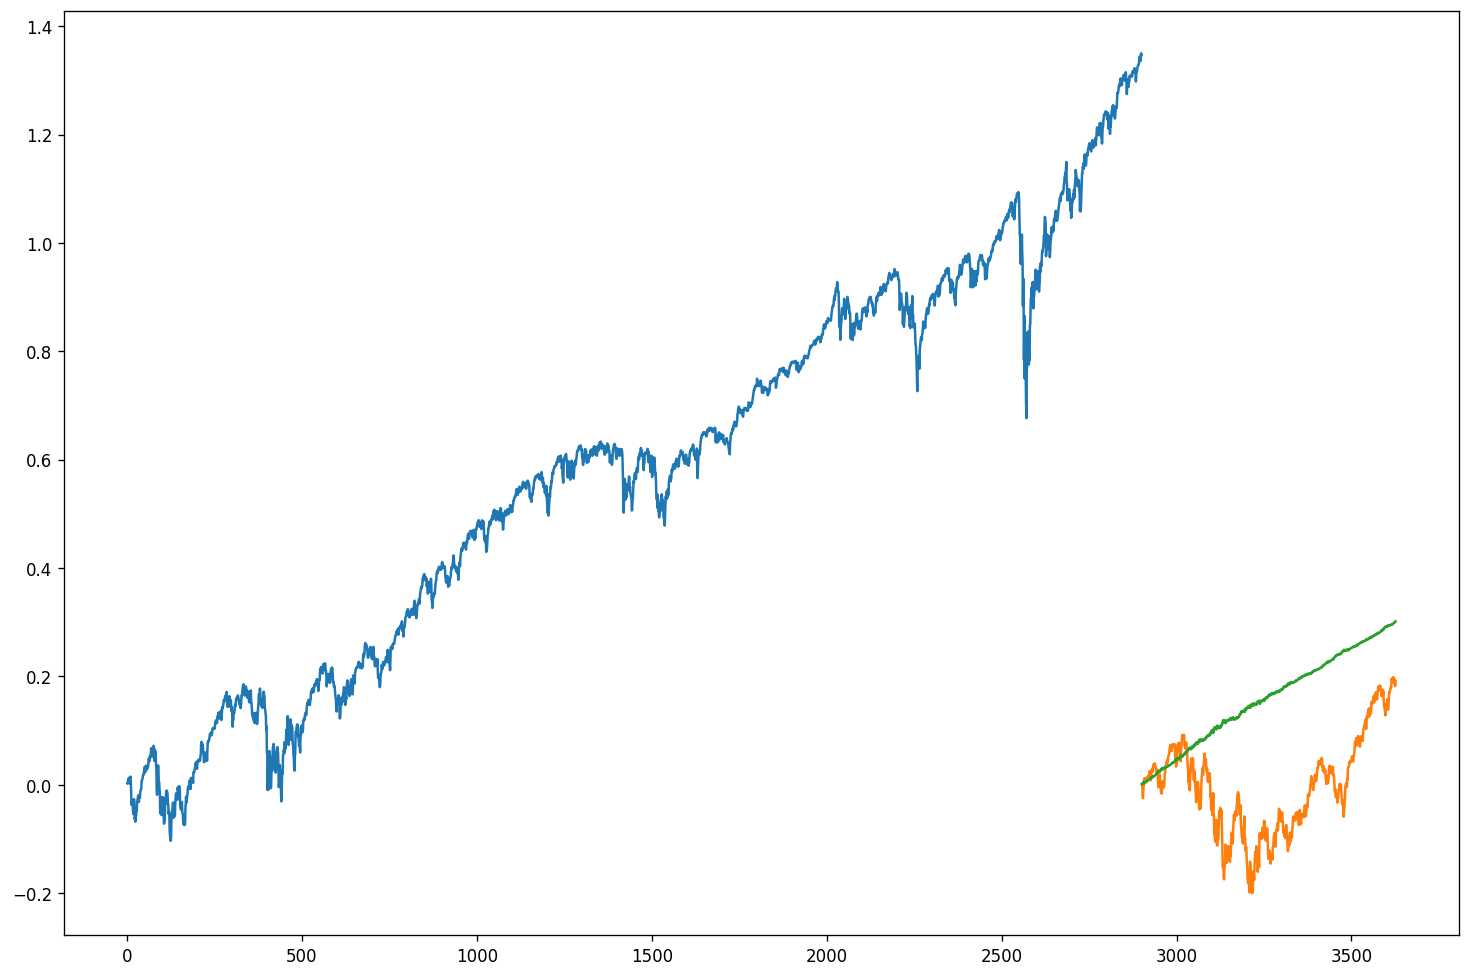

In [40]:
predictions_series = pd.Series(predictions, index=test.index)

plt.plot(train.cumsum(), label='training')
plt.plot(test.cumsum(), label='actual')
plt.plot(predictions_series.cumsum(), label='forecast')

In [33]:
# Result similar to 
# https://medium.com/@anisha4422/time-series-forecasting-of-spy-stocks-series-1-ce425babd92a

# <Center> Observations </Center>
### 1.The models created by estimating p,d,q values have insignificant p values to justify the model. We need additional
### Independent variables or different values of p,d and q
### 3.The output is able to show a trend but doesnt capture the variance or uncertainity  

#     <Center> Improvements </Center>
### 1. Use Auto ARIMA model in python 
### 2. ARIMA + GARCH ( https://www.quantstart.com/articles/ARIMA-GARCH-Trading-Strategy-on-the-SP500-Stock-Market-Index-Using-R/)
### 3. Other than itself, USE dependent variables as predictors ( SARIMAX)
### 4. Plot output along with 95% confidence intervals ( https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting?scriptVersionId=45343451&cellId=43)
